In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [5]:
number_data=keras.datasets.mnist
(x_train_full,y_train_full),(x_test_full,y_test_full)=number_data.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
print(f"x_train_full shape : {x_train_full.shape}")
print(f"y_train_full shape : {y_train_full.shape}")
print(f"x_test_full shape : {x_test_full.shape}")
print(f"y_test_full shape : {y_test_full.shape}")

x_train_full shape : (60000, 28, 28)
y_train_full shape : (60000,)
x_test_full shape : (10000, 28, 28)
y_test_full shape : (10000,)


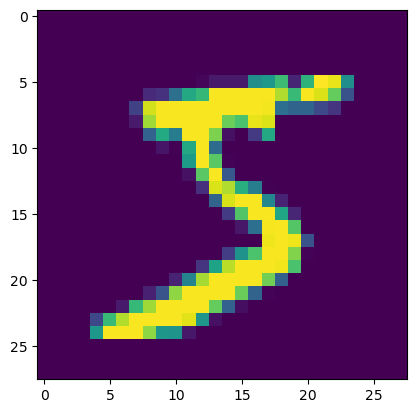

In [11]:
plt.figure()
plt.imshow(x_train_full[0])
plt.grid(False)
plt.show()

In [12]:
# scaling 
x_vaild,x_train=x_train_full[:5000]/255,x_train_full[5000:]/255
y_vaild,y_train=y_train_full[:5000],y_train_full[5000:]

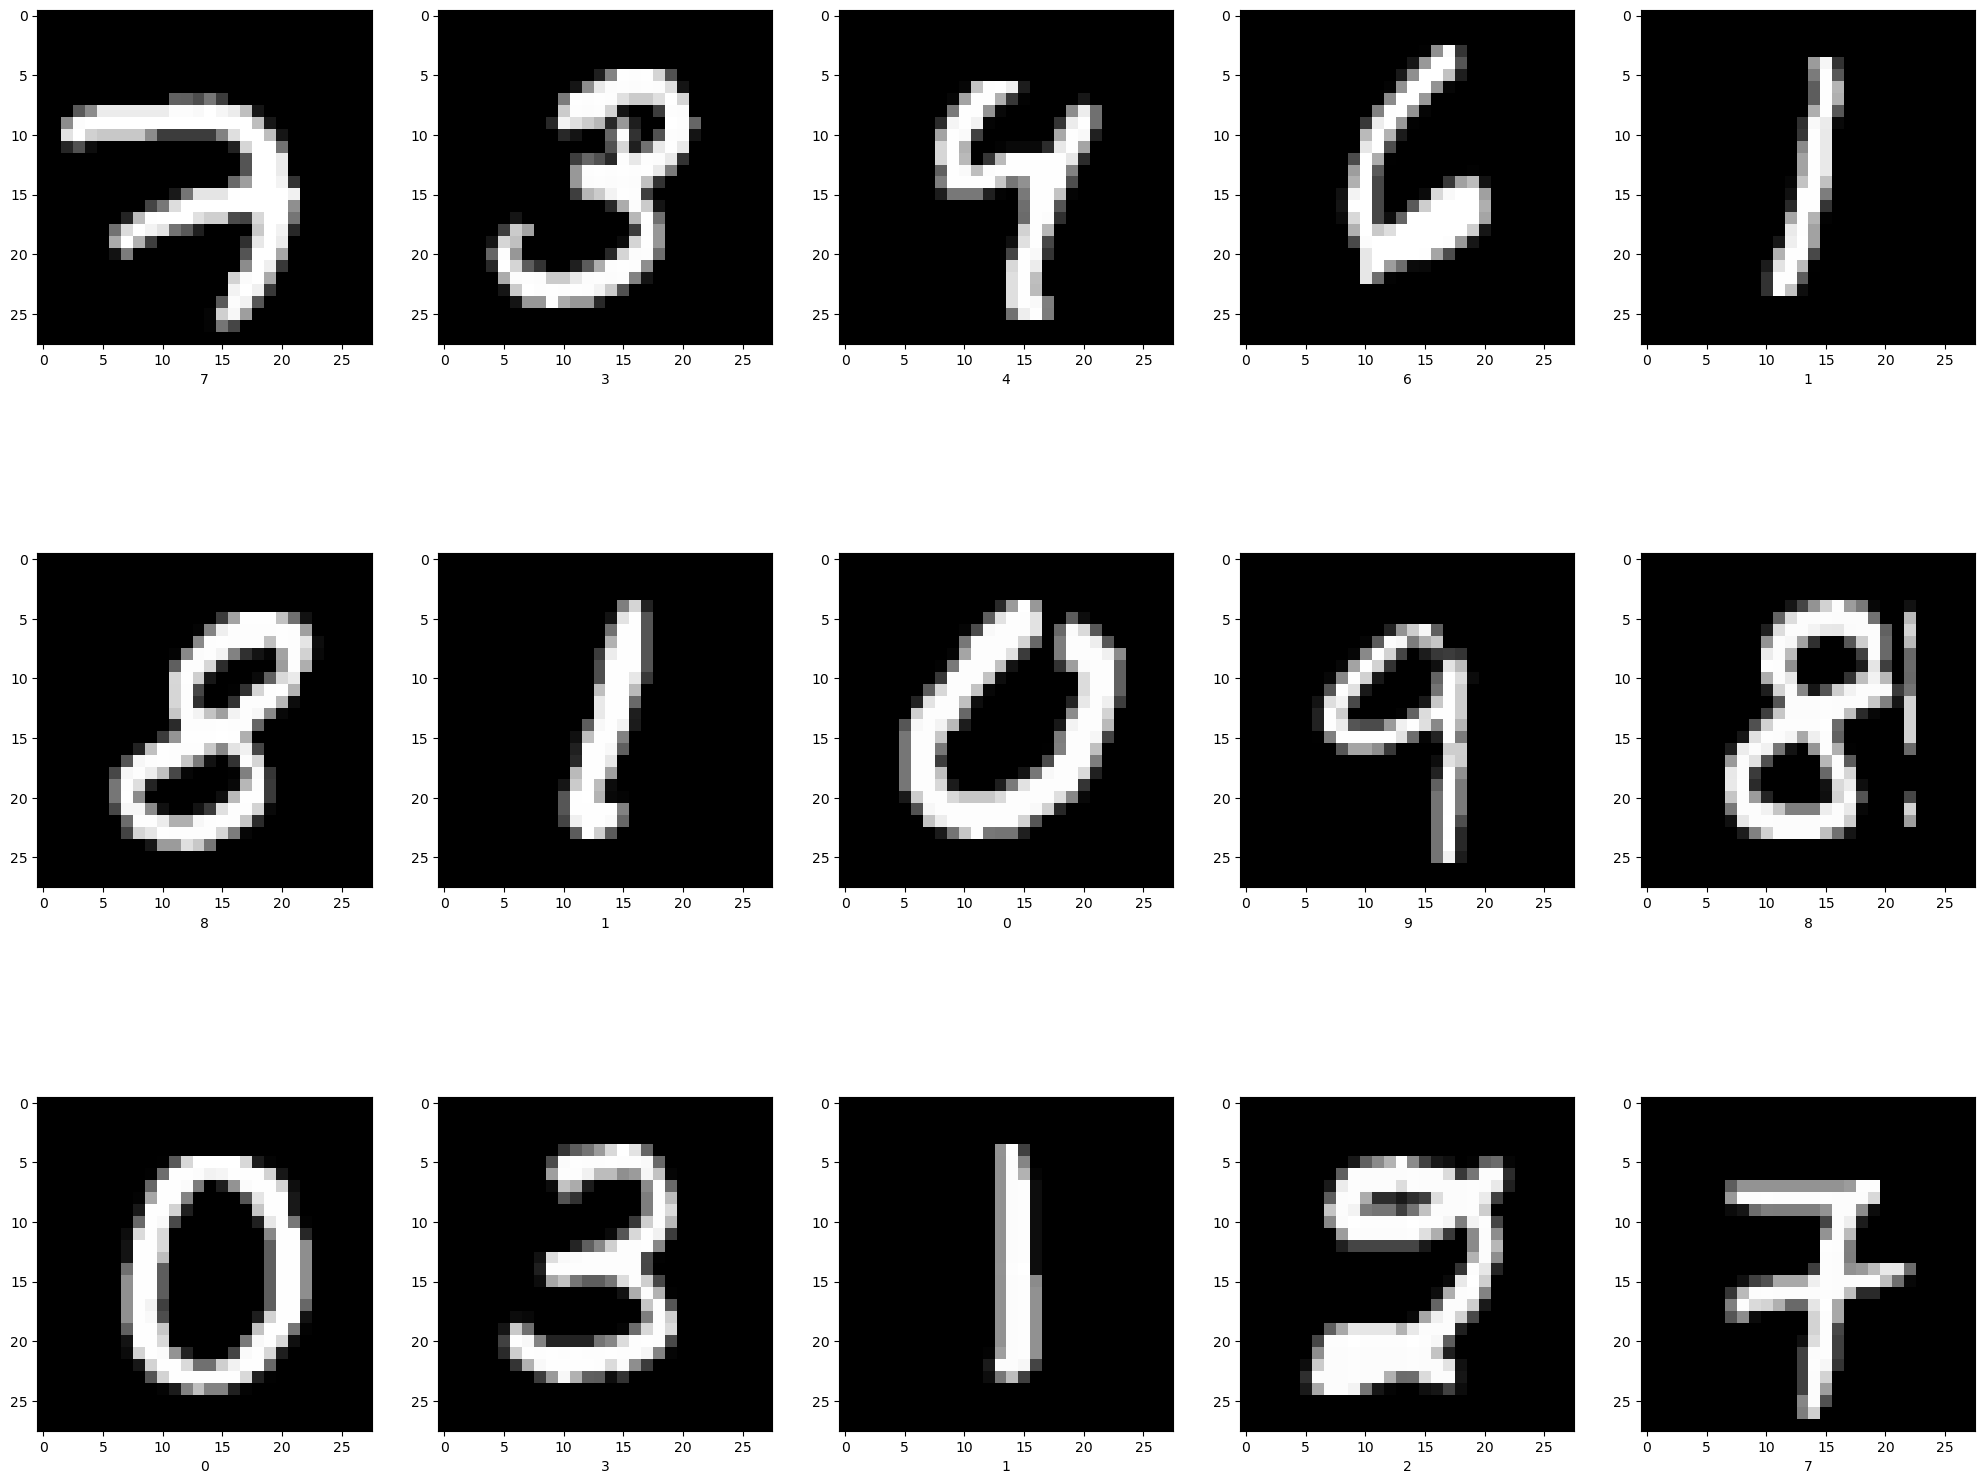

In [21]:
plt.figure(figsize=(25,20))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_train[i],cmap="gray")
    plt.grid(False)
    plt.xlabel(y_train[i])
plt.show()

# DL Model

In [36]:
model=Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dense(16,activation="relu"),
    Dense(10,activation="softmax")
])

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,946 (429.48 KB)

 Trainable params: 109,946 (429.48 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [39]:
number_model=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_vaild,y_vaild))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8286 - loss: 0.5512 - val_accuracy: 0.9618 - val_loss: 0.1345
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9617 - loss: 0.1243 - val_accuracy: 0.9722 - val_loss: 0.0978
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9751 - loss: 0.0802 - val_accuracy: 0.9714 - val_loss: 0.0851
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9818 - loss: 0.0572 - val_accuracy: 0.9682 - val_loss: 0.1030
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9859 - loss: 0.0448 - val_accuracy: 0.9724 - val_loss: 0.0992
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9877 - loss: 0.0365 - val_accuracy: 0.9778 - val_loss: 0.0870
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9909 - loss: 0.0283 - val_accuracy: 0.9760 - val_loss: 0.1026
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9904 - loss: 0.0293 - 

In [40]:
loss_vaild,acc_vaild=model.evaluate(x_vaild,y_vaild)
print(f"loss valid = {loss_vaild}")
print(f"vaild_accuracy = {acc_vaild}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.1208
loss valid = 0.10855777561664581
vaild_accuracy = 0.977400004863739


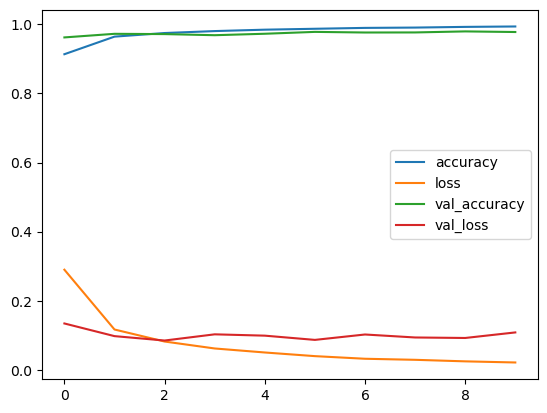

In [44]:
pd.DataFrame(number_model.history).plot()
plt.show()

In [46]:
model.evaluate(x_test_full,y_test_full)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9702 - loss: 29.2272


[24.699331283569336, 0.9743000268936157]

In [48]:
y_pred=model.predict(x_test_full[:25])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [49]:
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [52]:
y_final=np.argmax(y_pred,axis=1)

In [53]:
y_final

array([7, 2, 1, 0, 4, 1, 4, 3, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4], dtype=int64)

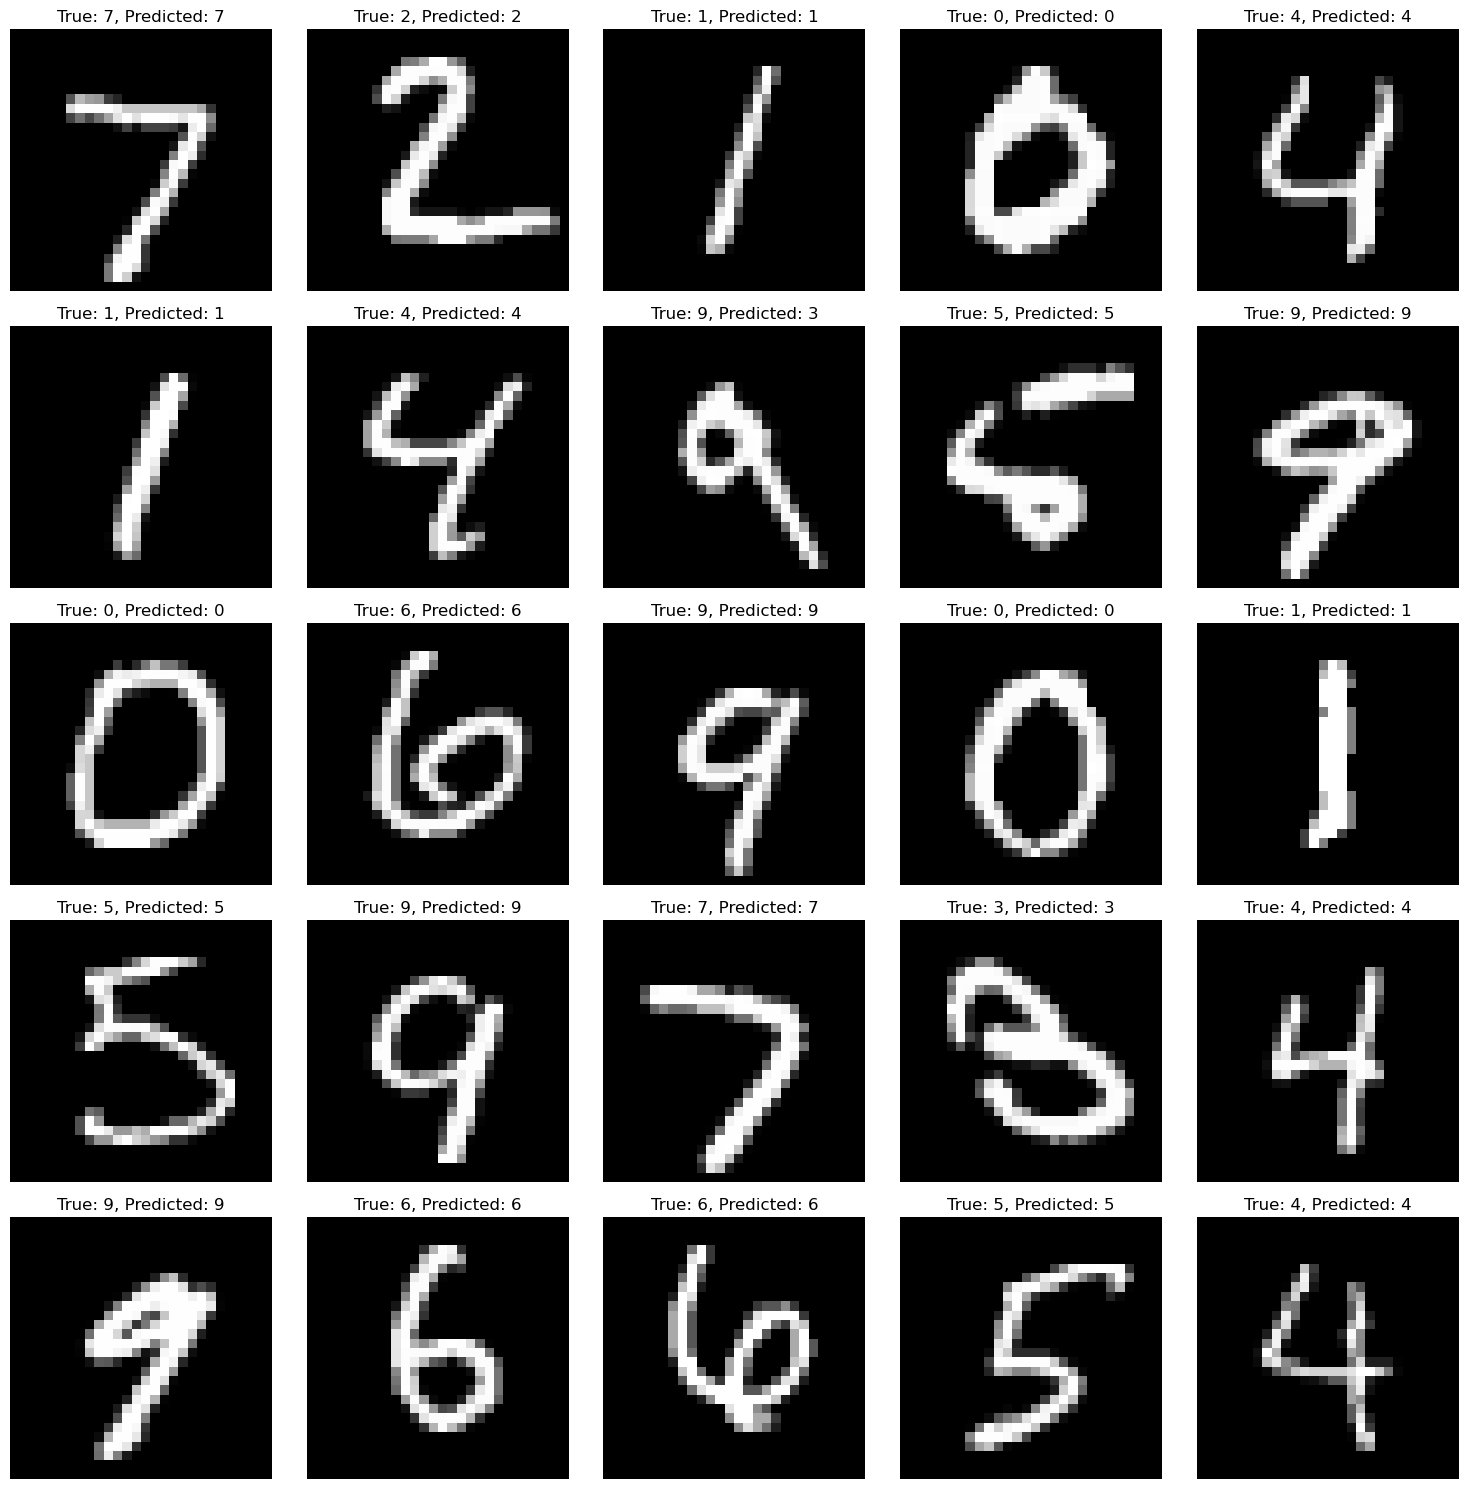

In [61]:
# show the images with predictation
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test_full[i],cmap="gray")
    plt.grid(False)
    #plt.xlabel(y_final[i])
    plt.title(f"True: {y_test_full[i]}, Predicted: {y_final[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [62]:
model.save('model.h5')